In [48]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

input_file = "/Users/szymontrochimiak/Library/CloudStorage/CloudMounter-SzymonTrochimiak/Nauka/PW/MINI/Data Processing in R and Python/Data/ethereum.stackexchange.com/Posts.xml"

In [49]:
df_posts = pd.read_xml(input_file)

In [50]:
df_posts

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,ContentLicense,ParentId,ClosedDate,OwnerDisplayName,CommunityOwnedDate,FavoriteCount,LastEditorDisplayName
0,2,1,13.0,2016-01-20T16:48:00.060,108,37014.0,<p>What is the process/workflow behind the pro...,23.0,42.0,2016-04-09T00:44:13.177,...,<contract-design><contract-development><oracle...,7.0,0,CC BY-SA 3.0,NaN,None,None,None,NaN,None
1,3,1,62.0,2016-01-20T16:49:09.363,259,193504.0,<p>An Ethereum application that I want to use ...,25.0,14115.0,2018-04-29T20:50:26.577,...,<transactions><gas><economics><terminology><de...,9.0,1,CC BY-SA 3.0,NaN,None,None,None,NaN,None
2,4,1,37.0,2016-01-20T16:50:17.610,8,1361.0,<p>I see a large number of news stories and co...,23.0,42.0,2016-11-10T21:18:16.007,...,<blockchain><private-blockchain>,2.0,2,CC BY-SA 3.0,NaN,None,None,None,NaN,None
3,6,1,35.0,2016-01-20T16:53:26.043,45,28749.0,<p>I want to store my ether in a form that req...,25.0,76.0,2016-03-15T09:13:48.337,...,<contract-design><accounts><multisignature>,3.0,0,CC BY-SA 3.0,NaN,None,None,None,NaN,None
4,7,2,NaN,2016-01-20T16:53:34.023,11,NaN,<p>Gas is basically the internal pricing for r...,23.0,NaN,None,...,None,NaN,0,CC BY-SA 3.0,3.0,None,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112934,156996,1,NaN,2023-12-02T22:45:36.800,0,7.0,<p>I am implementing a feature an NFT feature ...,115139.0,NaN,None,...,<nft>,0.0,0,CC BY-SA 4.0,NaN,None,None,None,NaN,None
112935,156997,1,NaN,2023-12-03T00:43:26.690,0,5.0,<p>[![I received that amount from an unknown s...,128754.0,NaN,None,...,<smart-contract-wallets><hack><convert>,0.0,0,CC BY-SA 4.0,NaN,None,None,None,NaN,None
112936,156998,1,NaN,2023-12-03T01:30:02.207,0,8.0,<p>I have a backend code that uses the endpoin...,90974.0,NaN,None,...,<evm><infura><rpc><quicknode><endpoint>,0.0,0,CC BY-SA 4.0,NaN,None,None,None,NaN,None
112937,156999,1,NaN,2023-12-03T02:23:11.613,0,6.0,<p>Coins ph supported ETH (ERC20) and i though...,128757.0,NaN,None,...,<go-ethereum><etherscan><ethereum-wallet-dapp>,0.0,0,CC BY-SA 4.0,NaN,None,None,None,NaN,None


In [51]:
df_posts["CreationDate"] = pd.to_datetime(df_posts["CreationDate"])
df_posts["LastActivityDate"] = pd.to_datetime(df_posts["LastActivityDate"])
df_posts["LastEditDate"] = pd.to_datetime(df_posts["LastEditDate"])
df_posts["ClosedDate"] = pd.to_datetime(df_posts["ClosedDate"])
df_posts["CommunityOwnedDate"] = pd.to_datetime(df_posts["CommunityOwnedDate"])

In [52]:
ethereum_price = "/Users/szymontrochimiak/Documents/gts/dprpy_assignment_3/historical_prices/ETH-USD.csv"
df_ethereum = pd.read_csv(ethereum_price)
df_ethereum["Price"] = (df_ethereum["Close"] + df_ethereum["Open"]) / 2

In [53]:
df_ethereum

,Date,Open,High,Low,Close,Adj Close,Volume,Price
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,314.764496
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,309.961991
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,306.633499
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,311.298996
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,311.870498
...,...,...,...,...,...,...,...,...
2266,2024-01-23,2310.951660,2348.031250,2167.282471,2240.686035,2240.686035,16182147521,2275.818848
2267,2024-01-24,2241.749756,2261.384521,2197.656738,2233.561768,2233.561768,10134722960,2237.655762
2268,2024-01-25,2233.969971,2240.380859,2173.686523,2217.710205,2217.710205,9302247037,2225.840088
2269,2024-01-26,2217.441895,2280.383789,2196.140137,2267.199707,2267.199707,9975117607,2242.320801


In [54]:
df_ethereum["Date"] = pd.to_datetime(df_ethereum["Date"])
df_ethereum["Date"] = df_ethereum["Date"].dt.tz_localize(None)
df_ethereum.index = df_ethereum["Date"]
del df_ethereum["Date"]

In [55]:
# limit timeframe
df_posts = df_posts[df_posts["CreationDate"] >= datetime.datetime.fromisoformat("2018-01-01")][df_posts["CreationDate"] <= datetime.datetime.fromisoformat("2023-06-01")]
df_ethereum = df_ethereum[datetime.datetime.fromisoformat("2018-01-01"):datetime.datetime.fromisoformat("2023-06-01")]

/var/folders/v3/x_ps6wr13g52vv22zxx8c_fr0000gn/T/ipykernel_2321/3247718861.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_posts = df_posts[df_posts["CreationDate"] >= datetime.datetime.fromisoformat("2018-01-01")][df_posts["CreationDate"] <= datetime.datetime.fromisoformat("2023-06-01")]


In [56]:
questions = df_posts[df_posts["PostTypeId"]==1]
answers = df_posts[df_posts["PostTypeId"]==2]

## Proportion of answers to questions

<Axes: xlabel='CreationDate'>

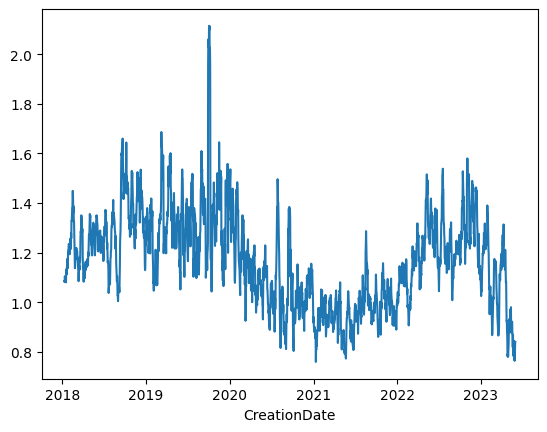

In [57]:
(answers.groupby(df_posts["CreationDate"].dt.date).size() / questions.groupby(df_posts["CreationDate"].dt.date).size()).rolling(window=10).mean().plot()
#answers.groupby(df_posts["CreationDate"].dt.date).size().rolling(window=10).mean().plot()

## posts to cardano

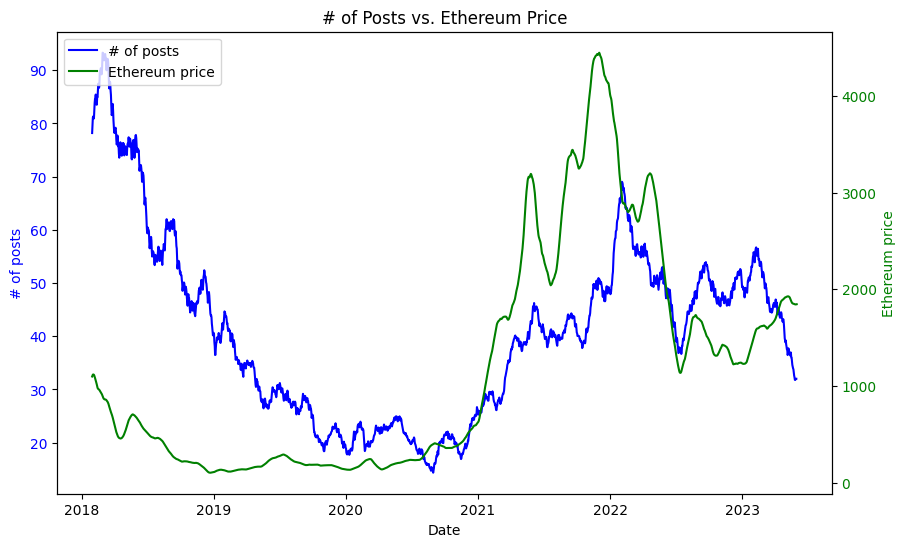

In [58]:
series1 = df_posts.groupby(df_posts["CreationDate"].dt.date).size().rolling(window=30).mean()
series2 = df_ethereum["Price"].rolling(window=30).mean()

color_palet = ("blue", "green")
title = '# of Posts vs. Ethereum Price'
ax_title = ('# of posts', 'Ethereum price')
path = "/Users/szymontrochimiak/Downloads/ethereum_price.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

<Axes: >

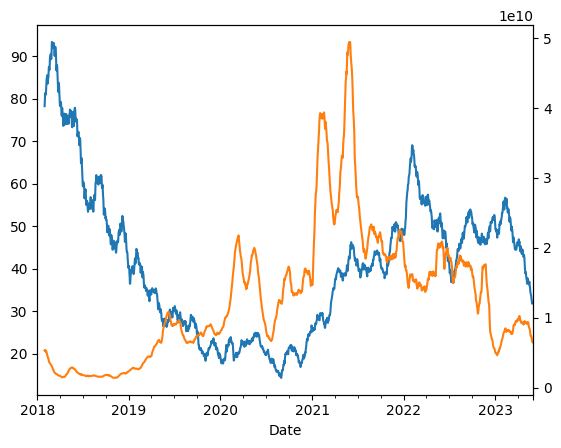

In [13]:
ax = df_posts.groupby(df_posts["CreationDate"].dt.date).size().rolling(window=30).mean().plot()
df_ethereum["Volume"].rolling(window=30).mean().plot(ax=ax, secondary_y=True)

## Add column which indicates if post has "buy" and "sell" word

<Axes: xlabel='CreationDate'>

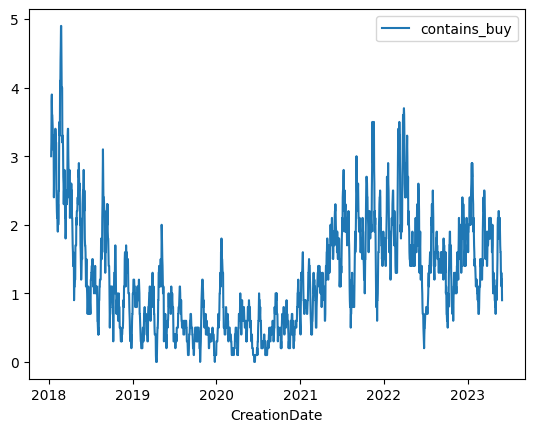

In [14]:
df_posts['contains_buy'] = df_posts['Body'].str.contains('buy', case=False, na=False)
df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_buy': 'sum'}).rolling(window=10).mean().plot()

<Axes: xlabel='CreationDate'>

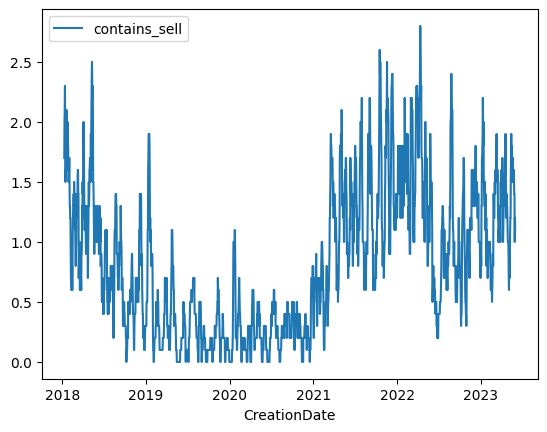

In [15]:
df_posts['contains_sell'] = df_posts['Body'].str.contains('sell', case=False, na=False)
df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_sell': 'sum'}).rolling(window=10).mean().plot()

In [17]:
date_range = pd.date_range(start=datetime.datetime.fromisoformat("2018-01-01"), end=datetime.datetime.fromisoformat("2023-06-01"), freq='D')

buy = df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_buy': 'sum'}).reindex(date_range).fillna(0).replace([np.inf, -np.inf], 0)
sell = df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_sell': 'sum'}).reindex(date_range).fillna(0).replace([np.inf, -np.inf], 0)
all_posts = df_posts.groupby(df_posts["CreationDate"].dt.date).size().reindex(date_range).fillna(0).replace([np.inf, -np.inf], 0)

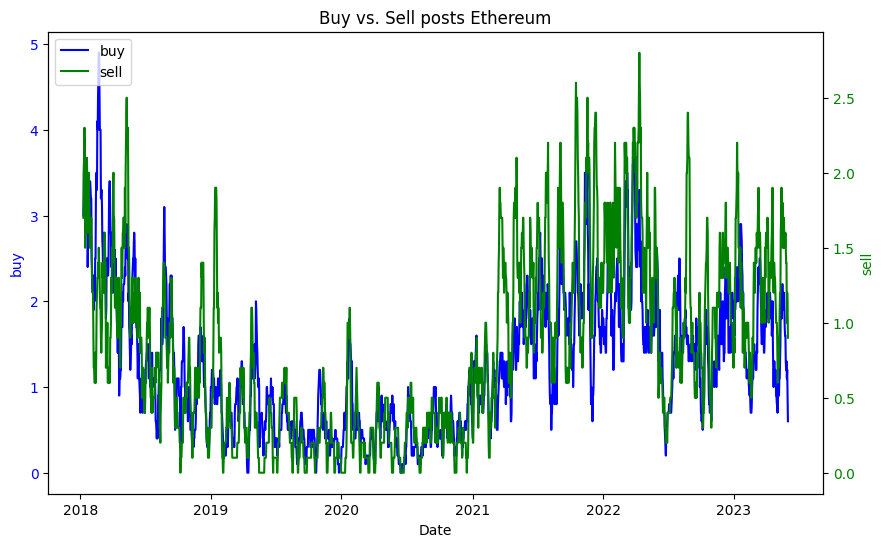

In [59]:
series1 = buy.rolling(window=10).mean()
series2 = sell.rolling(window=10).mean()

color_palet = ("blue", "green")
title = 'Buy vs. Sell posts Ethereum'
ax_title = ('buy', 'sell')
path = "/Users/szymontrochimiak/Downloads/ethereum_buy_sell.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

## Correlations

In [60]:
from scipy.signal import correlate
import matplotlib.pyplot as plt
import numpy as np

def calculate_correlation(signal1, signal2):
    norm_signal1 = (signal1 - np.mean(signal1)) / np.std(signal1)
    norm_signal2 = (signal2 - np.mean(signal2)) / np.std(signal2)
    
    xcorr = correlate(norm_signal1, norm_signal2, mode='full', method='auto') / len(signal1)
    plt.plot(xcorr)
    plt.show()
    
    # The shift is determined by the index of the maximum correlation
    max_corr_index = np.argmax(xcorr)
    shift = max_corr_index - (len(signal1) - 1)
    return shift, np.max(xcorr)

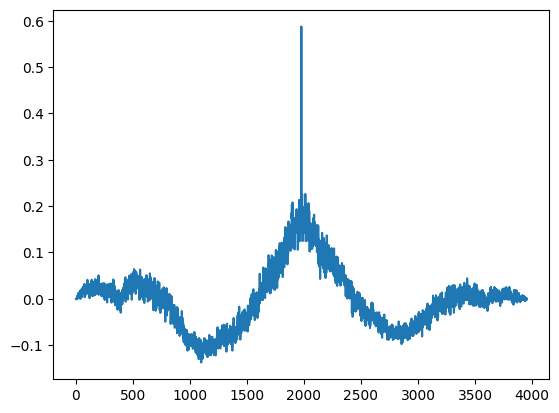

(0, 0.5876902263624326)

In [61]:
calculate_correlation(buy["contains_buy"], sell["contains_sell"])

Ok correlation, but no shift

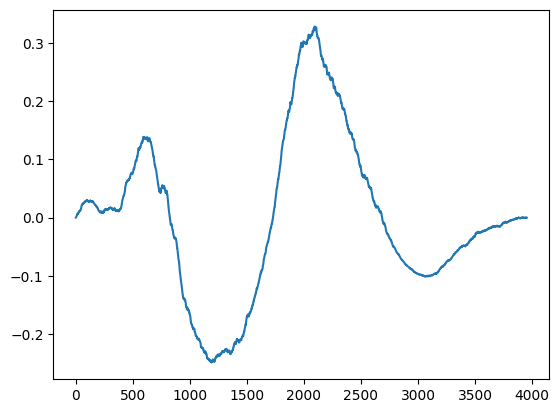

(117, 0.327887739475834)

In [62]:
calculate_correlation(buy["contains_buy"], df_ethereum["Price"])

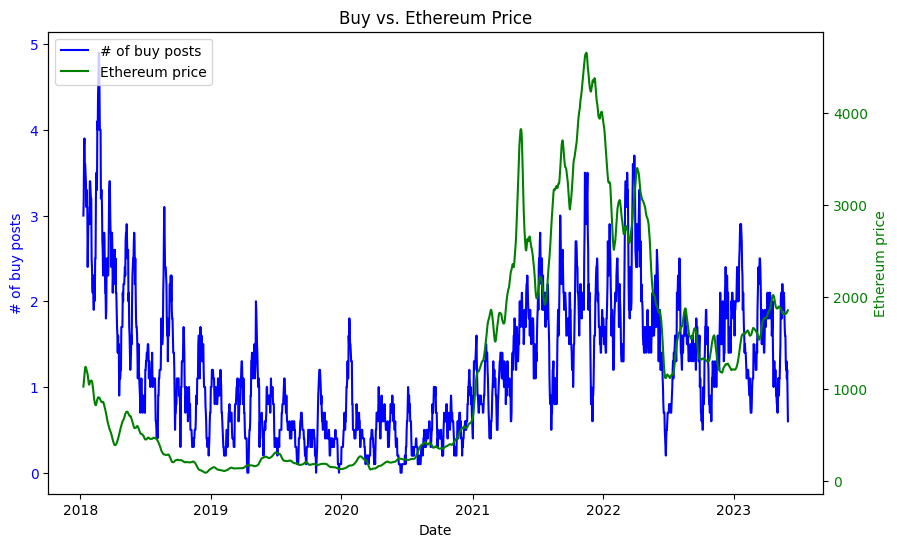

In [64]:
series1 = buy["contains_buy"].rolling(window=10).mean()
series2 = df_ethereum["Price"].rolling(window=10).mean()

color_palet = ("blue", "green")
title = 'Buy vs. Ethereum Price'
ax_title = ('# of buy posts', 'Ethereum price')
path = "/Users/szymontrochimiak/Downloads/ethereum_buy_price.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

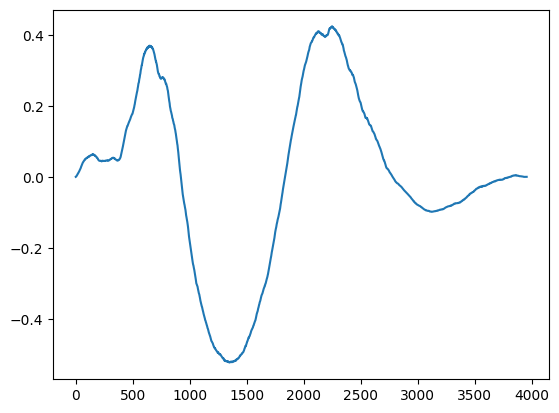

(270, 0.4233671738204741)

In [66]:
calculate_correlation(all_posts, df_ethereum["Price"])

ok correlation but the price preceeeds the posts

<Axes: >

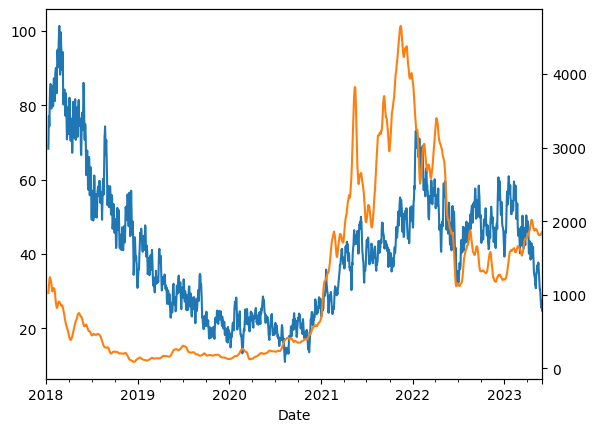

In [67]:
ax = all_posts.rolling(window=10).mean().plot()
df_ethereum["Price"].rolling(window=10).mean().plot(ax=ax, secondary_y=True)

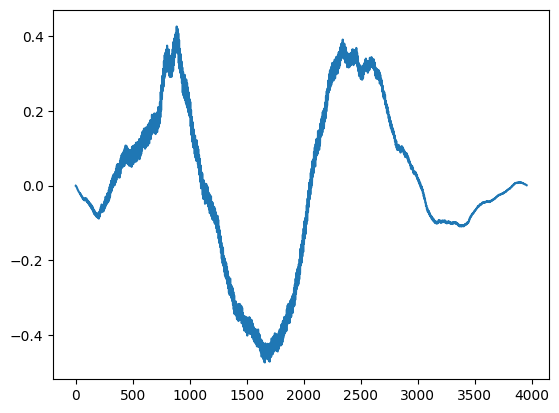

(-1092, 0.4251723520111217)

In [68]:
calculate_correlation(all_posts, df_ethereum["Volume"])

## Correlation of buy-sell with bitcoin price

<Axes: >

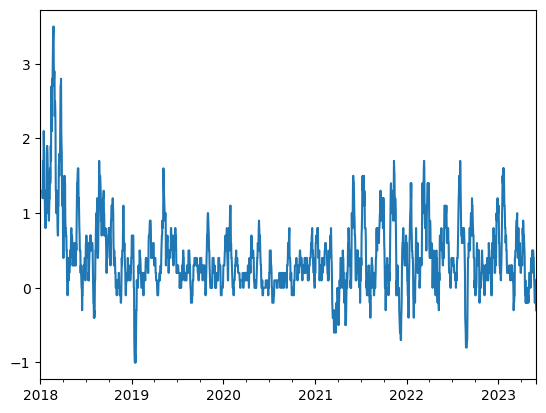

In [69]:
(buy["contains_buy"]-sell["contains_sell"]).rolling(window=10).mean().plot()

/var/folders/v3/x_ps6wr13g52vv22zxx8c_fr0000gn/T/ipykernel_2321/3181531764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ethereum["price_diff"] = (df_ethereum["Price"].diff() / df_ethereum["Price"]).fillna(0)


<Axes: xlabel='Date'>

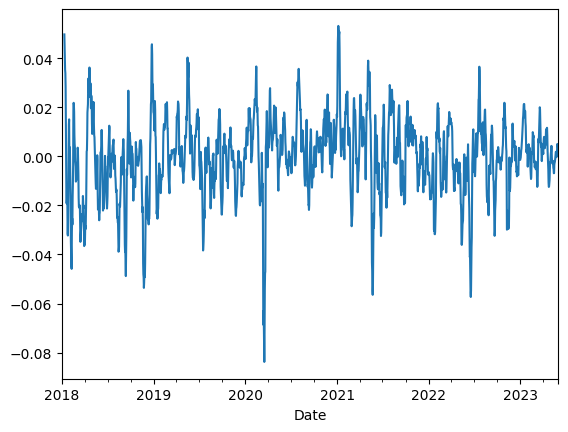

In [70]:
# calculate difference in bitcoin price and normalize based on day price
df_ethereum["price_diff"] = (df_ethereum["Price"].diff() / df_ethereum["Price"]).fillna(0)
df_ethereum["price_diff"].rolling(window=10).mean().plot()

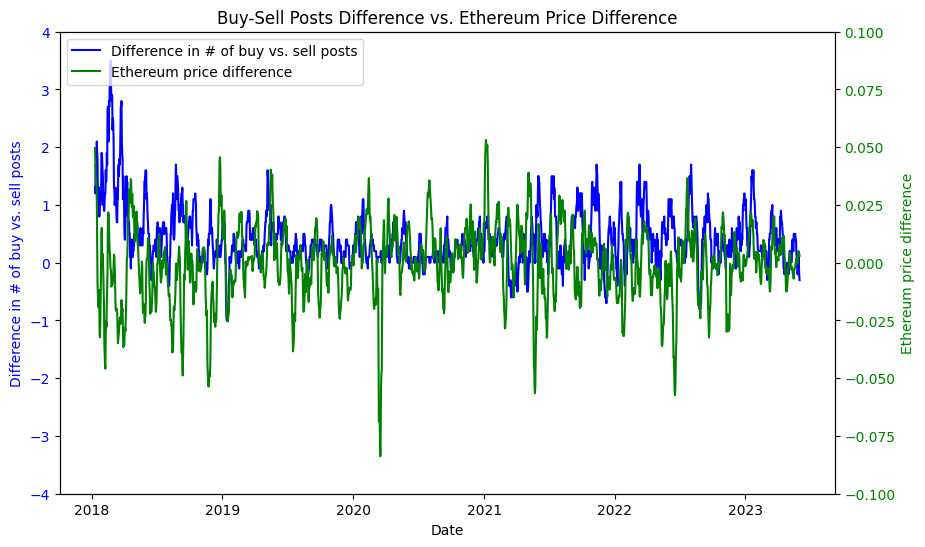

In [74]:
series1 = (buy["contains_buy"]-sell["contains_sell"]).rolling(window=10).mean()
series2 = df_ethereum["price_diff"].rolling(window=10).mean()

color_palet = ("blue", "green")
title = 'Buy-Sell Posts Difference vs. Ethereum Price Difference'
ax_title = ('Difference in # of buy vs. sell posts', 'Ethereum price difference')
path = "/Users/szymontrochimiak/Downloads/ethereum_buy_sell_price_diff.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylim([-4, 4])
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylim([-0.1, 0.1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

In [75]:
len((buy["contains_buy"]-sell["contains_sell"])), len(df_ethereum["price_diff"])

(1978, 1978)

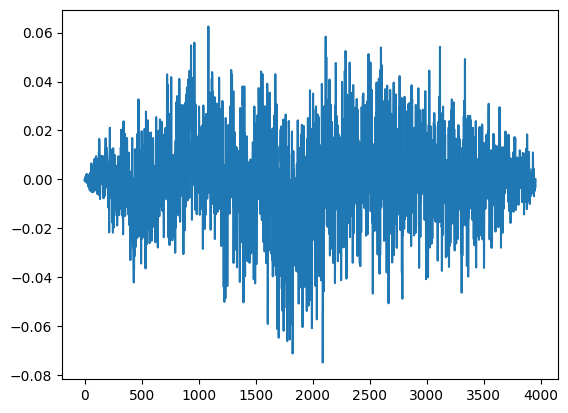

(-892, 0.06251395971369327)

In [76]:
calculate_correlation(buy["contains_buy"] - sell["contains_sell"], df_ethereum["price_diff"])

### Get only gaining days

In [77]:
# select only gaining days, the rest set to 0
df_bitcoin_gaining = df_ethereum.copy()
df_bitcoin_gaining[df_bitcoin_gaining["price_diff"] < 0] = 0
df_bitcoin_gaining

,Open,High,Low,Close,Adj Close,Volume,Price,price_diff
Date,,,,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128,764.199005,0.000000
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760,828.394989,0.077494
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936,924.359985,0.103818
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776,971.317505,0.048344
2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824,986.734985,0.015625
...,...,...,...,...,...,...,...,...
2023-05-28,1831.098633,1915.723267,1825.467285,1910.914185,1910.914185,6359610561,1871.006409,0.021999
2023-05-29,1909.297485,1926.421753,1879.077515,1893.078125,1893.078125,5884674572,1901.187805,0.015875
2023-05-30,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000


<Axes: >

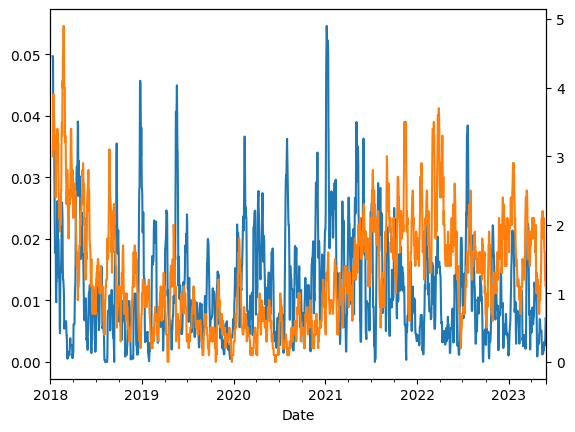

In [78]:
ax = df_bitcoin_gaining["price_diff"].rolling(window=10).mean().plot()
buy["contains_buy"].rolling(window=10).mean().plot(ax=ax, secondary_y=True)

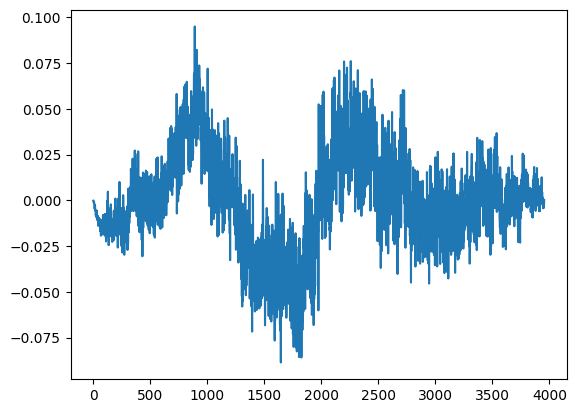

(-1087, 0.09502348919383556)

In [79]:
calculate_correlation(buy["contains_buy"], df_bitcoin_gaining["price_diff"])

Pretty weak correlation

### Get only loosing days

In [80]:
# select only gaining days, the rest set to 0
df_bitcoin_loosing = df_ethereum.copy()
df_bitcoin_loosing[df_bitcoin_loosing["price_diff"] > 0] = 0
df_bitcoin_loosing["price_diff"] *= -1
df_bitcoin_loosing

,Open,High,Low,Close,Adj Close,Volume,Price,price_diff
Date,,,,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128,764.199005,-0.000000
2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
2018-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
2018-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
2018-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
...,...,...,...,...,...,...,...,...
2023-05-28,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
2023-05-29,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
2023-05-30,1893.093140,1916.574951,1883.934692,1901.026611,1901.026611,5363439784,1897.059876,0.002176


<Axes: >

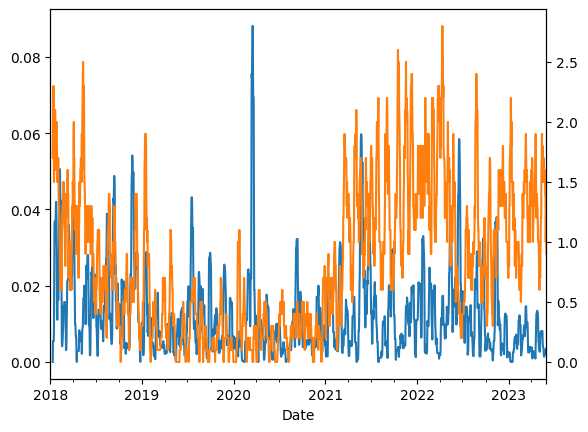

In [81]:
ax = df_bitcoin_loosing["price_diff"].rolling(window=10).mean().plot()
sell["contains_sell"].rolling(window=10).mean().plot(ax=ax, secondary_y=True)

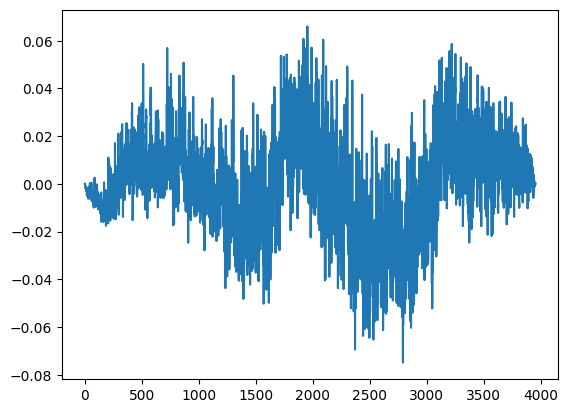

(-24, 0.06598918328673803)

In [82]:
calculate_correlation(sell["contains_sell"], df_bitcoin_loosing["price_diff"])

Pretty weak correlation

## Volume correlation

<Axes: xlabel='Date'>

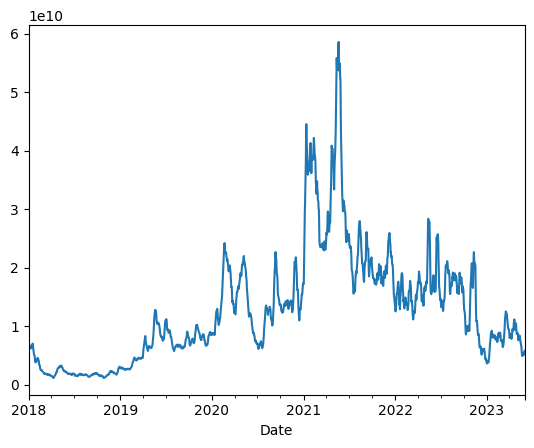

In [83]:
df_ethereum["Volume"].rolling(window=10).mean().plot()

/var/folders/v3/x_ps6wr13g52vv22zxx8c_fr0000gn/T/ipykernel_2321/3577067953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ethereum["volume_diff"] = (df_ethereum["Volume"].diff() / df_ethereum["Volume"]).fillna(0).replace([np.inf, -np.inf], 0)


<Axes: xlabel='Date'>

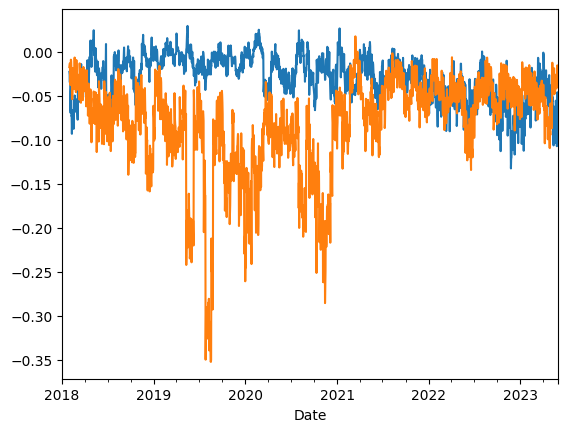

In [84]:
df_ethereum["volume_diff"] = (df_ethereum["Volume"].diff() / df_ethereum["Volume"]).fillna(0).replace([np.inf, -np.inf], 0)
ax = df_ethereum["volume_diff"].rolling(window=30).mean().plot()

all_posts_diff = (all_posts.diff() / all_posts).fillna(0).replace([np.inf, -np.inf], 0)
all_posts_diff.rolling(window=30).mean().plot(ax=ax)

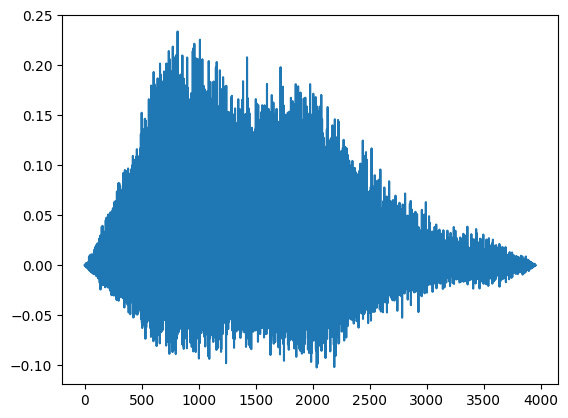

(-1162, 0.23376517544892333)

In [85]:
calculate_correlation(all_posts_diff, df_ethereum["volume_diff"])

weak correlation

## Examine only small part

In [86]:
start_date = datetime.date.fromisoformat("2021-01-01")
end_date = datetime.date.fromisoformat("2022-06-01")
buy.loc[start_date:end_date]

,contains_buy
2021-01-01,0.0
2021-01-02,0.0
2021-01-03,4.0
2021-01-04,2.0
2021-01-05,3.0
...,...
2022-05-28,0.0
2022-05-29,1.0
2022-05-30,6.0
2022-05-31,3.0


<Axes: >

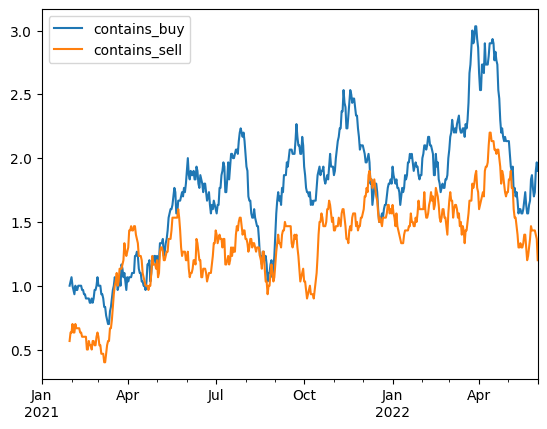

In [87]:
ax = buy.loc[start_date:end_date].rolling(window=30).mean().plot()
sell.loc[start_date:end_date].rolling(window=30).mean().plot(ax=ax)

<Axes: >

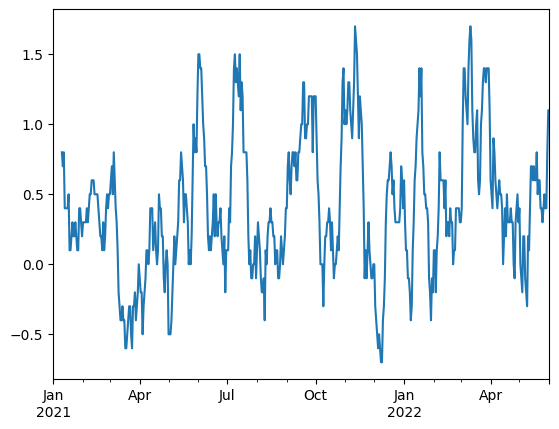

In [88]:
(buy["contains_buy"]-sell["contains_sell"])[start_date:end_date].rolling(window=10).mean().plot()

<Axes: xlabel='Date'>

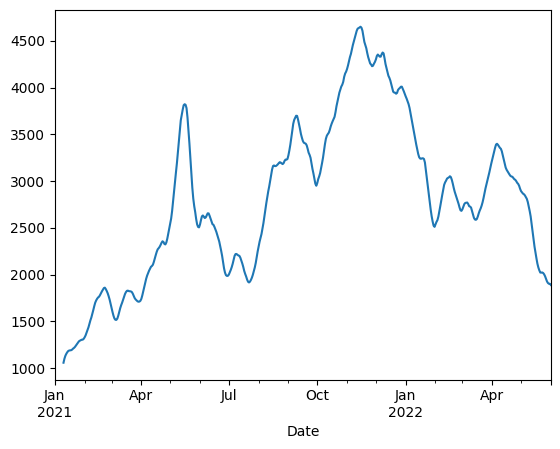

In [89]:
df_ethereum.loc[start_date:end_date]["Price"].rolling(window=10).mean().plot()

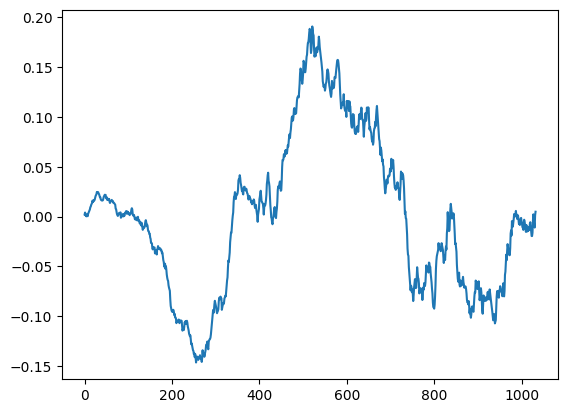

(5, 0.1909756035201615)

In [90]:
calculate_correlation(buy.loc[start_date:end_date]["contains_buy"], df_ethereum.loc[start_date:end_date]["Price"])

bad correlation

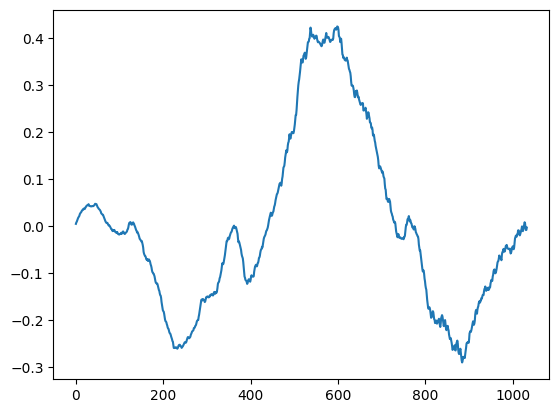

(82, 0.42431447442436976)

In [91]:
calculate_correlation(all_posts.loc[start_date:end_date], df_ethereum.loc[start_date:end_date]["Price"])

Good but price preceeds posts

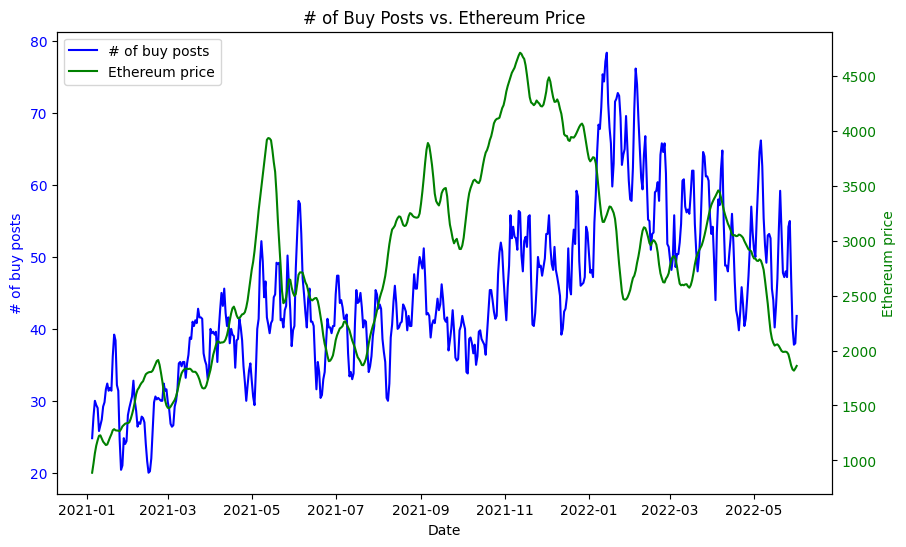

In [92]:
series1 = all_posts.loc[start_date:end_date].rolling(window=5).mean()
series2 = df_ethereum.loc[start_date:end_date]["Price"].rolling(window=5).mean()

color_palet = ("blue", "green")
title = '# of Buy Posts vs. Ethereum Price'
ax_title = ('# of buy posts', 'Ethereum price')
path = "/Users/szymontrochimiak/Downloads/ethereum_buy_price_small.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

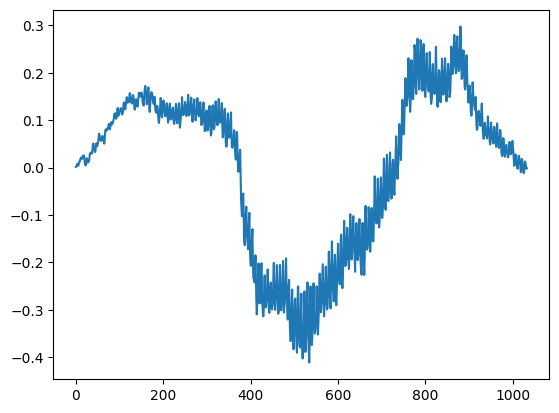

(364, 0.29755707095900535)

In [46]:
calculate_correlation(all_posts.loc[start_date:end_date], df_ethereum.loc[start_date:end_date]["Volume"])

<Axes: >

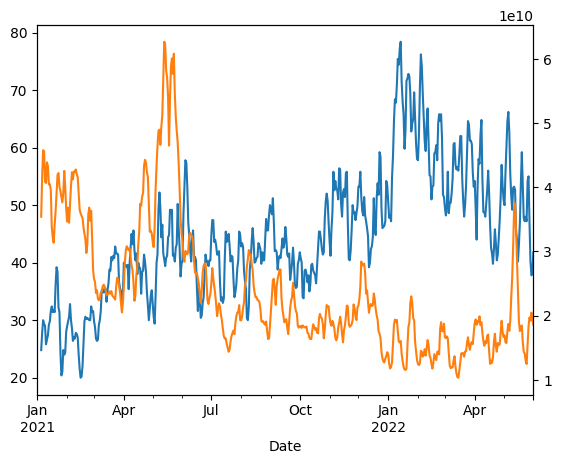

In [47]:
ax = all_posts.loc[start_date:end_date].rolling(window=5).mean().plot()
df_ethereum.loc[start_date:end_date]["Volume"].rolling(window=5).mean().plot(ax=ax, secondary_y=True)